<a href="https://colab.research.google.com/github/MicahMeadows/CSC-781-GoogleColab/blob/main/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

#### Load dataset

In [2]:
irisData = load_iris()

source = irisData.data
target = irisData.target

print(source[:5])
print(target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split dataset

In [3]:
import numpy as np

# combine target with features
target = np.expand_dims(target, 1)
data = np.append(source, target, 1)

# shuffle data
np.random.shuffle(data)

# split data
num_samples = len(data)
train_samples_top_idx = int(num_samples * .6)
dev_samples_max_idx = int(num_samples * .8)
train_samples = data[:train_samples_top_idx]
dev_samples = data[train_samples_top_idx:dev_samples_max_idx]
test_samples = data[dev_samples_max_idx:]

#### Define methods to extract features and labels from combined data

In [4]:
def get_features(data):
  return data[:, :-1]

def get_labels(data):
  return data[:, -1]

In [5]:
train_features = get_features(train_samples)
train_labels = get_labels(train_samples)

dev_features = get_features(dev_samples)
dev_labels = get_labels(dev_samples)

test_features = get_features(test_samples)
test_labels = get_labels(test_samples)

#### Euclidean distance

In [6]:
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i]) ** 2
  return np.sqrt(distance)

#### Select K Neighbors

In [7]:
def get_neighbors(samples: list, labels, test_row, num_neighbors):
  neighbors = []

  # get distances of all samples
  for i in range(len(samples)):
    row = samples[i]
    label = labels[i]
    dist = euclidean_distance(row, test_row)
    neighbors.append((row, label, dist))
  
  # sort closest neighbors
  neighbors.sort(key=lambda i: i[2])

  # get closest 'num_neighbors'
  output_neighbors = []
  output_labels = []
  output_distances = []

  k_neighbors = neighbors[:num_neighbors]

  for neighbor in k_neighbors:
    output_neighbors.append(neighbor[0])
    output_labels.append(neighbor[1])
    output_distances.append(neighbor[2])

  return output_neighbors, output_labels, output_distances

#### Make Prediction

In [8]:
def prediction_classification(test_samples, test_labels, test_sample, num_neighbors):
  close_samples, close_labels, close_distances = get_neighbors(test_samples, test_labels, test_sample, num_neighbors)
  label_cnt = np.bincount(close_labels)
  prediction = np.argmax(label_cnt)
  return prediction

In [9]:
k = 4
pred_labels = []
for i in range(len(dev_samples)):
  result = prediction_classification(train_samples, train_labels, dev_samples[i], k)
  pred_labels.append(result)

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(dev_labels, pred_labels)
print(acc)

0.9333333333333333


#### Test All K Values

In [11]:
k_list = list(range(1, 80, 3))
performance = []
for k in k_list:
  pred_labels = []
  for i in range(len(dev_samples)):
    result = prediction_classification(train_samples, train_labels, dev_samples[i], k)
    pred_labels.append(result)
  accuracy = accuracy_score(dev_labels, pred_labels)
  performance.append(accuracy)

Text(0.5, 1.0, 'Performance')

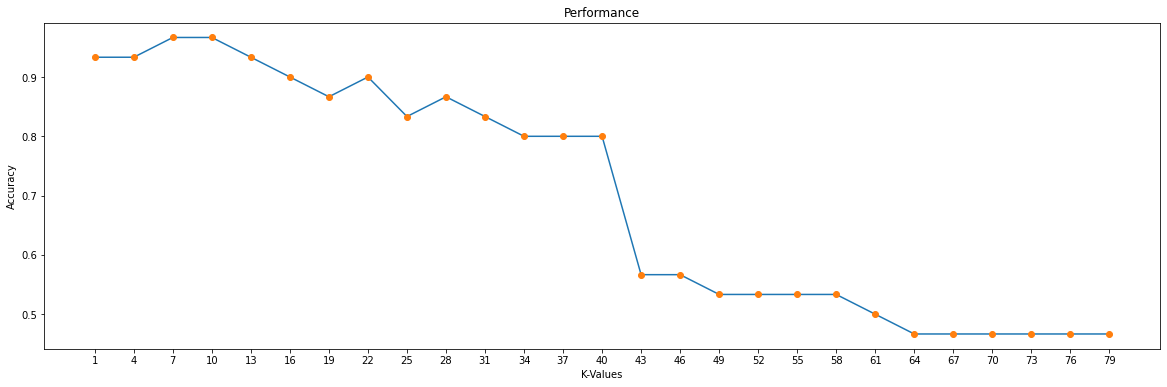

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(k_list, performance)
plt.plot(k_list, performance, 'o')
plt.xticks(k_list)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.title("Performance")

In [14]:
k = 7
pred_labels = []
for sample in test_samples:
  pred = prediction_classification(train_samples, train_labels, sample, k)
  pred_labels.append(pred)
accuracy = accuracy_score(test_labels, pred_labels)
print(accuracy)

0.9333333333333333
